In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('chicagocover.csv')

In [21]:
data.head()

,Building ID,Address,Zip,Cohort - Sector,Cohort - Size,Verification Year,Community Area Name,Community Area Number,Ward,Latitude,Longitude,Location
0,160354,750 N Dearborn St,60654,Residential,> 250000 Sq Ft,2024.0,Near North Side,8,2.0,41.896027,-87.629782,"(41.896027, -87.629782)"
1,251604,1010 E 72Nd St,60619,Commercial,> 50000 Sq Ft,2025.0,Greater Grand Crossing,69,5.0,41.764571,-87.600307,"(41.76457079, -87.60030731)"
2,260032,1616 E 50Th Pl,60615,Residential,> 50000 Sq Ft,2025.0,Kenwood,39,5.0,41.802240,-87.603327,"(41.80224043, -87.60332678)"
3,251522,8324 S Racine Ave,60620,Commercial,> 50000 Sq Ft,2023.0,Auburn Gresham,71,21.0,41.742430,-87.653862,"(41.74243045, -87.65386181)"
4,243246,1255 N Sandburg Ter,60610,Residential,> 250000 Sq Ft,2024.0,Near North Side,8,2.0,41.905402,-87.631892,"(41.90540203, -87.63189208)"


Here's a bar chart showing the distribution of buildings by community area in Chicago. Each bar represents the number of buildings in a specific community area, allowing you to see which areas have higher concentrations of benchmarked buildings.

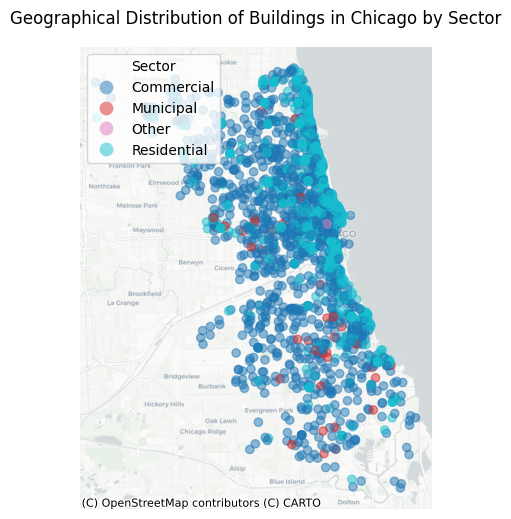

In [23]:
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Setting the coordinate reference system (CRS) to WGS84
geo_df.crs = "EPSG:4326"

# Re-projecting data to match the base map's projection (Web Mercator)
geo_df = geo_df.to_crs(epsg=3857)

# Plotting the data with a base map
ax = geo_df.plot(column='Cohort - Sector', figsize=(10, 6), alpha=0.5, legend=True,
                 legend_kwds={'title': 'Sector', 'loc': 'upper left'})
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_title('Geographical Distribution of Buildings in Chicago by Sector')
ax.set_axis_off()  # Hide axes for better map presentation




Here is the geographical distribution of buildings in Chicago plotted each building color-coded by its sector.

In [26]:


# Convert the DataFrame to JSON format
json_data = data.to_json(orient='records', lines=True)

# Save the JSON data to a file
with open('chicagocover1', 'w') as file:
    file.write(json_data)


In [32]:

source = pd.read_json('chicagocover.json')



SyntaxError: invalid syntax (<ipython-input-32-cbac5f042e0a>, line 1)